# **Título: Vacinação contra COVID-19 no Estado do Alagoas**

"Eu, Adelson Campos Lima, portador(a) da Cédula de Identidade RG n° 42.510.287 7, inscrito no CPF sob o n° 227.493.178-00, autorizo a cessão do meu projeto em favor da Semantix, bem como a divulgação do meu nome como autor responsável pelo projeto, uma vez que será possível incluir esse trabalho em meu portfólio de trabalho. Nesse sentido, autorizo também a divulgação dos meus contatos telefone e e-mail para a Semantix, tão somente para uso interno com finalidade única de contato em decorrência da elaboração do projeto mencionado."

    * Breve descrição do problema;
    * Código de importação de bibliotecas;
    * Código o download/carregamento/geração de dados;
    * Etapa de exploração;
    * Etapa de limpeza e transformação;
    * Etapa de análise (com visualizações);
    * Modelagem Preditiva
    * Conclusão.  


# Breve descrição do problema
O objetivo deste estudo é estudar os dados de vacinação contra COVID-19 no estado do Alagoas, Brasil. O foco está na distribuição das doses aplicadas, características demográficas dos pacientes e análise por gênero. Através dessas análises, buscamos extrair insights significativos que possam contribuir para entender a eficácia da campanha de vacinação e orientar decisões futuras.

# Código de Importação de Bibliotecas

In [58]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

In [60]:
warnings.filterwarnings('ignore')

# Código o download/carregamento/geração de dados

In [63]:
# Carregar o arquivo CSV (ajuste o caminho)
df = pd.read_csv(r'C:\Users\Joel\Downloads\Data Scientist\Mod 36\dados_al_red.csv', sep=';', encoding='utf-8')

# Exploração

In [66]:
# Visualizar as primeiras linhas
df.head()

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem
0,b86cb50d-3e34-4f6d-b12d-28da49200d5e-i0b0,33e13091da815e4bc1642f001501f8c48d7f646f685ed5...,30.0,12/02/1991,M,99.0,SEM INFORMACAO,270430.0,10.0,MACEIO,...,2.0,Faixa EtÃ¡ria,33020BD,PFIZER,Organization/28290,03/01/2022,2Âª Dose,87.0,COVID-19 PFIZER - COMIRNATY,Novo PNI
1,7fcf908a-cf3f-4917-a8ac-3d13b710598e-i0b0,f564e7e5ac7476569a66f045f16897c49903bd7d6ed6a2...,71.0,15/10/1952,F,3.0,PARDA,270430.0,10.0,MACEIO,...,2.0,Faixa EtÃ¡ria,2F3019A,PFIZER,28290,02/01/2024,ReforÃ§o,103.0,COVID-19 PFIZER - COMIRNATY BIVALENTE,Novo PNI
2,b86d20b2-cb8a-4716-8b90-653d8ece2683-i0b0,8a1a3bd064f8e5edb07f0555fa10198766637a787242b8...,47.0,26/01/1974,M,3.0,PARDA,270430.0,10.0,MACEIO,...,11.0,Pessoas com DeficiÃªncia,218VCD259Z,ASTRAZENECA/FIOCRUZ,Organization/149,06/01/2022,ReforÃ§o,85.0,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
3,7fd119a1-e97f-448a-801b-3dac3c7ebd2e-i0b0,dcb8afdcd0e25960a4ebe487ef1959cd4c1c8c032ee6b7...,12.0,29/07/2011,M,99.0,SEM INFORMACAO,270430.0,10.0,MACEIO,...,2.0,Faixa EtÃ¡ria,2400754/00,BUTANTAN,152,20/06/2024,Ãšnica,33.0,INF3,Novo PNI
4,b873b506-222b-4031-bb69-33a049c6a9b1-i0b0,f5fc105c6d81e7b2a0b24c82f9180292a32235d37d63f4...,39.0,14/10/1984,F,4.0,AMARELA,270640.0,10.0,PAO DE ACUCAR,...,1.0,Comorbidades,2F3021A,PFIZER,28290,15/03/2024,ReforÃ§o,103.0,COVID-19 PFIZER - COMIRNATY BIVALENTE,Novo PNI


# Limpeza e Transformação dos Dados

In [69]:
# 1. Converter datas para formato padrão
df['vacina_dataAplicacao'] = pd.to_datetime(df['vacina_dataAplicacao'], format='%d/%m/%Y', errors='coerce')

# 2. Substituir valores inconsistentes
df['paciente_racaCor_valor'] = df['paciente_racaCor_valor'].replace('SEM INFORMACAO', 'NÃO INFORMADO')

# 3. Tratar valores nulos (exemplo para CEP)
df['paciente_endereco_cep'] = df['paciente_endereco_cep'].fillna('NÃO INFORMADO')

# 4. Remover duplicatas (se houver)
df = df.drop_duplicates(subset=['document_id', 'paciente_id'])

# 5. Filtrar colunas relevantes (exemplo)
colunas_relevantes = [
    'paciente_idade', 'paciente_enumSexoBiologico', 'paciente_racaCor_valor',
    'vacina_fabricante_nome', 'vacina_dataAplicacao', 'vacina_descricao_dose',
    'estabelecimento_municipio_nome'
]
df_clean = df[colunas_relevantes].copy()

# Análise Descritiva

       paciente_idade           vacina_dataAplicacao
count      499.000000                            499
mean        40.066132  2022-03-08 08:07:41.723446784
min          0.000000            2021-01-20 00:00:00
25%         22.500000            2021-08-05 00:00:00
50%         40.000000            2021-11-23 00:00:00
75%         56.500000            2022-06-02 12:00:00
max        100.000000            2024-06-21 00:00:00
std         21.541163                            NaN


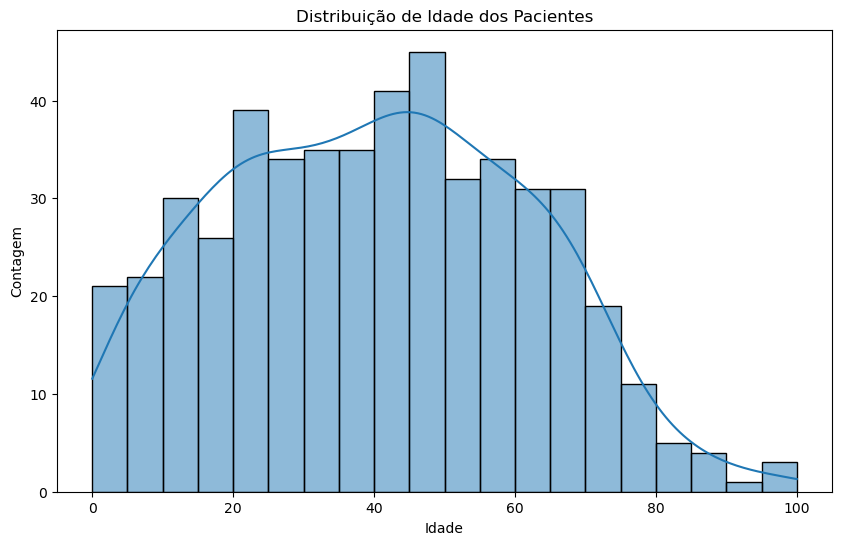

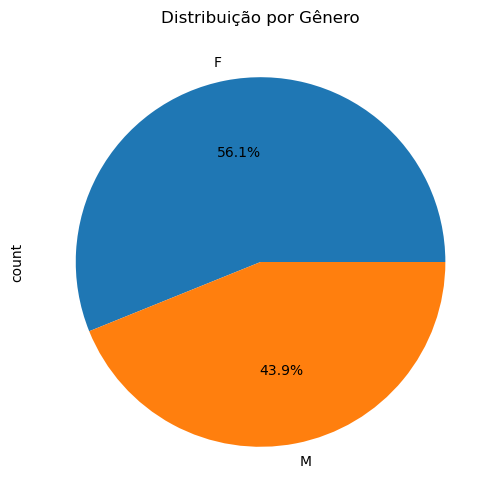

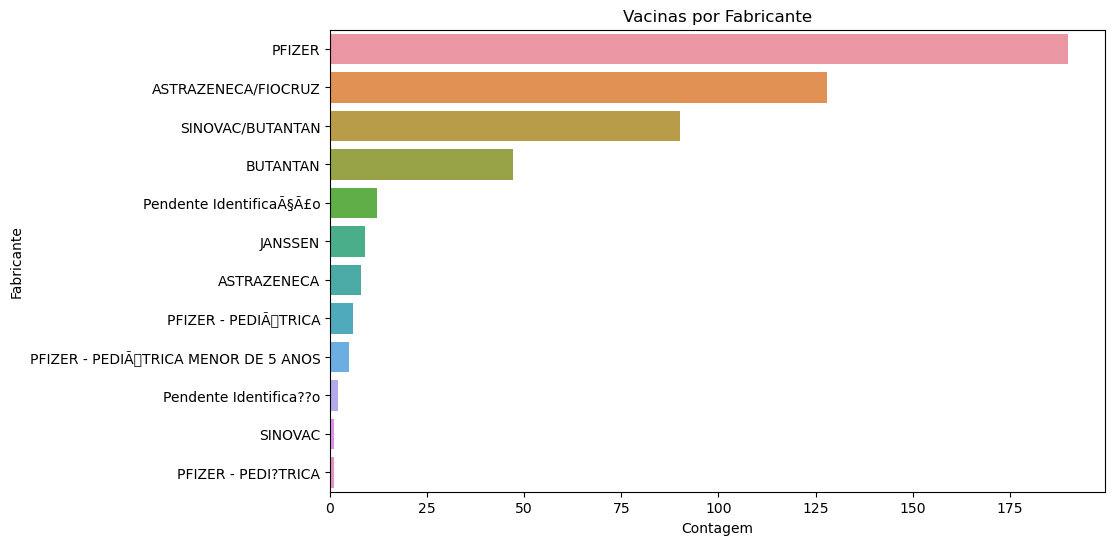

In [72]:
# 1. Estatísticas básicas
print(df_clean.describe())

# 2. Distribuição de idade
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['paciente_idade'], bins=20, kde=True)
plt.title('Distribuição de Idade dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

# 3. Proporção por gênero
plt.figure(figsize=(6, 6))
df_clean['paciente_enumSexoBiologico'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribuição por Gênero')
plt.show()

# 4. Fabricantes mais utilizados
plt.figure(figsize=(10, 6))
sns.countplot(y='vacina_fabricante_nome', data=df_clean, order=df_clean['vacina_fabricante_nome'].value_counts().index)
plt.title('Vacinas por Fabricante')
plt.xlabel('Contagem')
plt.ylabel('Fabricante')
plt.show()

# Análise Temporal

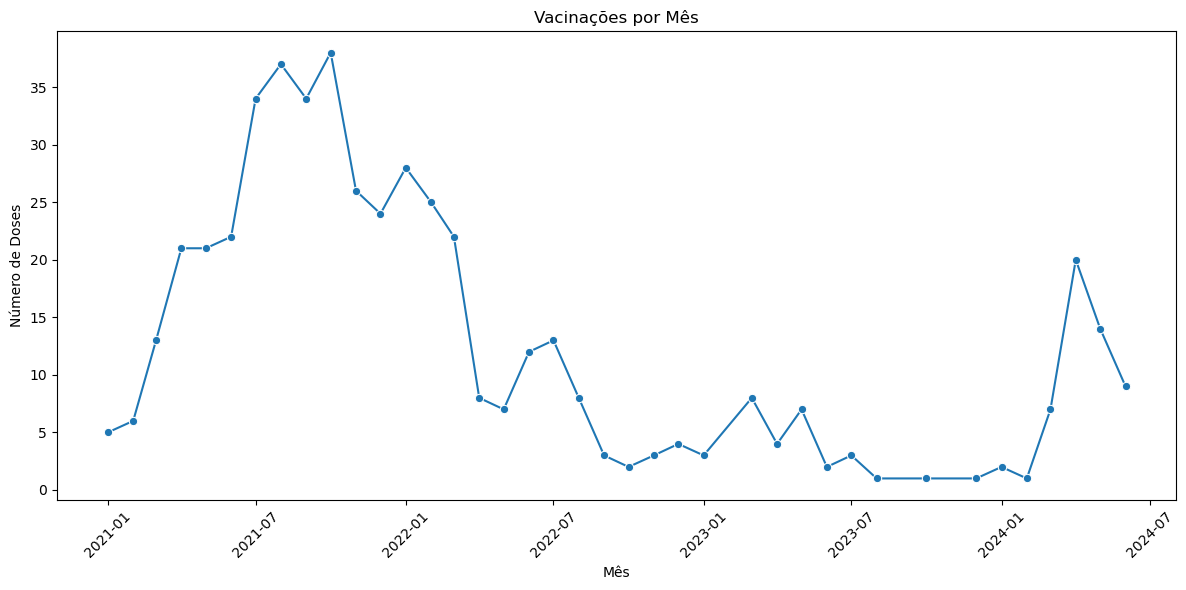

In [75]:
# Certifique-se de que a coluna 'vacina_dataAplicacao' esteja no formato datetime
df_clean['vacina_dataAplicacao'] = pd.to_datetime(df_clean['vacina_dataAplicacao'], errors='coerce')

# Cria a coluna 'mes' convertendo para período mensal e depois para timestamp
df_clean['mes'] = df_clean['vacina_dataAplicacao'].dt.to_period('M').dt.to_timestamp()

# Agrupa os dados por mês e conta o número de doses
contagem_mensal = df_clean.groupby('mes').size().reset_index(name='contagem')

# Cria o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(x='mes', y='contagem', data=contagem_mensal, marker='o')
plt.title('Vacinações por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Doses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análise de Grupos

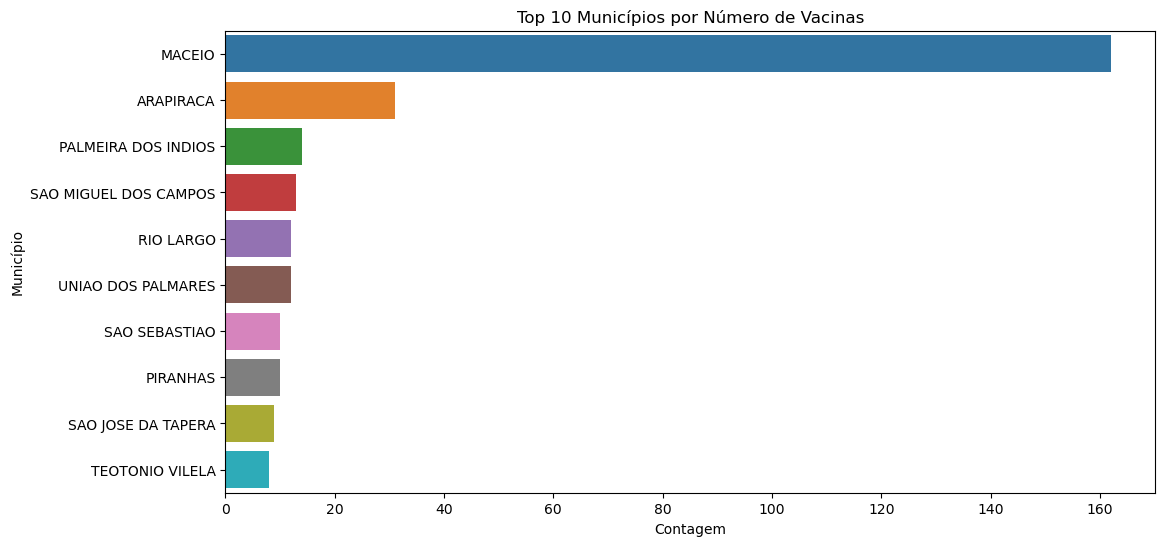

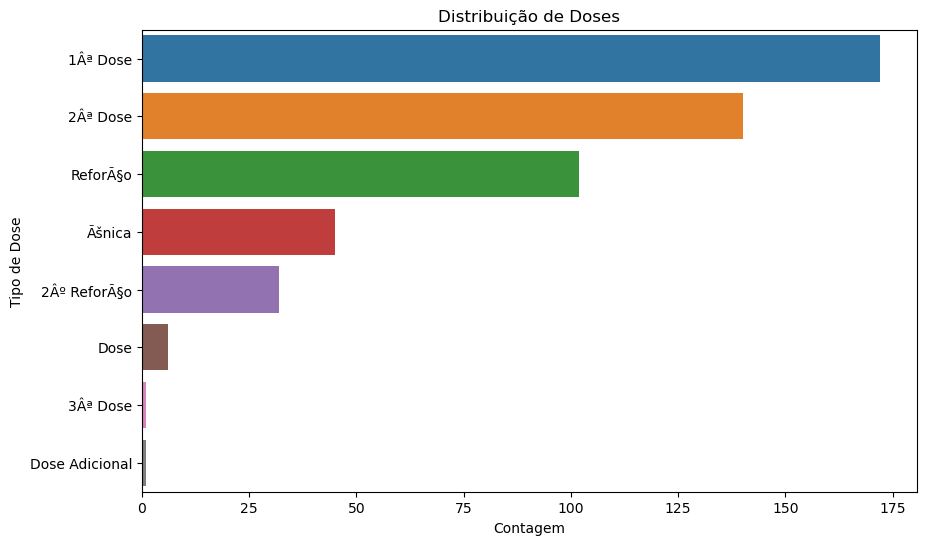

In [78]:
# 1. Cobertura por município (top 10)
top_municipios = df_clean['estabelecimento_municipio_nome'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_municipios.values, y=top_municipios.index)
plt.title('Top 10 Municípios por Número de Vacinas')
plt.xlabel('Contagem')
plt.ylabel('Município')
plt.show()

# 2. Doses por tipo (ex: 1ª dose, reforço)
plt.figure(figsize=(10, 6))
sns.countplot(y='vacina_descricao_dose', data=df_clean, order=df_clean['vacina_descricao_dose'].value_counts().index)
plt.title('Distribuição de Doses')
plt.xlabel('Contagem')
plt.ylabel('Tipo de Dose')
plt.show()

# Modelagem Preditiva 

O código prepara os dados, transforma o município em variáveis dummy e divide o conjunto em treino e teste. Em seguida, treina um modelo Random Forest para prever o tipo de dose da vacina com base na idade e no município, avaliando seu desempenho pela acurácia.

In [82]:
# Pré-processamento
df_model = df_clean[['paciente_idade', 'estabelecimento_municipio_nome', 'vacina_descricao_dose']].dropna()
df_model = pd.get_dummies(df_model, columns=['estabelecimento_municipio_nome'])

X = df_model.drop('vacina_descricao_dose', axis=1)
y = df_model['vacina_descricao_dose']

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar modelo
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Avaliar
y_pred = model.predict(X_test)
print(f'Acurácia: {accuracy_score(y_test, y_pred):.2f}')

Acurácia: 0.31


O código constrói um modelo Random Forest para prever o tipo de dose da vacina, selecionando variáveis relevantes, categorizando colunas não numéricas com One-Hot Encoding e criando um pipeline para processamento automático. Os dados são divididos em treino e teste, e a otimização de hiperparâmetros é feita com GridSearchCV para encontrar a melhor configuração do modelo. Por fim, o modelo é avaliado com métricas como acurácia e relatório de classificação.

In [85]:
# Selecionar variáveis relevantes (exemplo)
features = [
    'paciente_idade',
    'paciente_enumSexoBiologico',
    'paciente_racaCor_valor',
    'vacina_fabricante_nome',
    'estabelecimento_municipio_nome'
]

target = 'vacina_descricao_dose'

# Filtrar dados
df_model = df_clean[features + [target]].dropna()

# Definir variáveis categóricas e numéricas
categorical_features = [
    'paciente_enumSexoBiologico',
    'paciente_racaCor_valor',
    'vacina_fabricante_nome',
    'estabelecimento_municipio_nome'
]

numeric_features = ['paciente_idade']

# Pré-processamento: Codificar variáveis categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Criar pipeline com RandomForest
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Dividir dados
X = df_model.drop(target, axis=1)
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Otimizar hiperparâmetros com GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Métricas
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Acurácia: 0.53
              precision    recall  f1-score   support

    1Âª Dose       0.48      0.57      0.52        53
    2Âª Dose       0.38      0.29      0.32        42
2Âº ReforÃ§o       0.33      0.25      0.29        12
        Dose       1.00      1.00      1.00         1
    ReforÃ§o       0.59      0.68      0.63        28
      Ãšnica       1.00      1.00      1.00        14

    accuracy                           0.53       150
   macro avg       0.63      0.63      0.63       150
weighted avg       0.51      0.53      0.52       150



O código verifica a estrutura do DataFrame, define variáveis-alvo e preditoras, realiza engenharia de features com extração de ano e mês da data de vacinação, separa variáveis numéricas e categóricas, e constrói um pipeline de pré-processamento e modelagem com Random Forest. Após dividir os dados em treino e teste, o modelo é treinado e avaliado com a métrica de acurácia.

In [88]:
# ----------------------------------------
# 1. Verificar colunas existentes
# ----------------------------------------
print("Colunas disponíveis no DataFrame:")
print(df.columns.tolist())

# ----------------------------------------
# 2. Definir variáveis manualmente (ajuste conforme suas colunas!)
# ----------------------------------------
target = 'vacina_descricao_dose'  # Substitua pelo nome correto da sua coluna alvo

# Lista de colunas a serem usadas como features (ajuste com os nomes corretos!)
features = [
    'paciente_idade',
    'paciente_enumSexoBiologico',
    'paciente_racaCor_valor',
    'vacina_fabricante_nome',
    'estabelecimento_municipio_nome',
    'vacina_dataAplicacao'  # Exemplo de coluna de data
]

# Verificar se todas as colunas existem
missing_cols = [col for col in features if col not in df.columns]
if missing_cols:
    raise ValueError(f"Colunas não encontradas: {missing_cols}")

# ----------------------------------------
# 3. Engenharia de features (exemplo)
# ----------------------------------------
# Criar colunas de data (se necessário)
if 'vacina_dataAplicacao' in features:
    df['vacina_dataAplicacao'] = pd.to_datetime(df['vacina_dataAplicacao'], errors='coerce')
    df['ano_vacina'] = df['vacina_dataAplicacao'].dt.year
    df['mes_vacina'] = df['vacina_dataAplicacao'].dt.month
    features += ['ano_vacina', 'mes_vacina']  # Adicionar novas colunas às features

# ----------------------------------------
# 4. Pré-processamento
# ----------------------------------------
# Separar variáveis categóricas e numéricas
numeric_features = ['paciente_idade', 'ano_vacina', 'mes_vacina']
categorical_features = [
    'paciente_enumSexoBiologico',
    'paciente_racaCor_valor',
    'vacina_fabricante_nome',
    'estabelecimento_municipio_nome'
]

# Verificar novamente as colunas
for col in numeric_features + categorical_features:
    if col not in df.columns:
        raise ValueError(f"Coluna {col} não encontrada após engenharia de features!")

# Pipeline de pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# ----------------------------------------
# 5. Modelagem
# ----------------------------------------
# Filtrar dados e remover nulos
df_model = df[features + [target]].dropna()

# Dividir dados
X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42))
])

# Treinar e avaliar
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")

Colunas disponíveis no DataFrame:
['document_id', 'paciente_id', 'paciente_idade', 'paciente_dataNascimento', 'paciente_enumSexoBiologico', 'paciente_racaCor_codigo', 'paciente_racaCor_valor', 'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais', 'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais', 'paciente_endereco_uf', 'paciente_endereco_cep', 'paciente_nacionalidade_enumNacionalidade', 'estabelecimento_valor', 'estabelecimento_razaoSocial', 'estalecimento_noFantasia', 'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome', 'estabelecimento_uf', 'vacina_grupoAtendimento_codigo', 'vacina_grupoAtendimento_nome', 'vacina_categoria_codigo', 'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome', 'vacina_fabricante_referencia', 'vacina_dataAplicacao', 'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome', 'sistema_origem']
Acurácia: 0.73


In [90]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    1Âª Dose       0.71      0.75      0.73        53
    2Âª Dose       0.62      0.62      0.62        42
2Âº ReforÃ§o       1.00      0.50      0.67        12
        Dose       1.00      1.00      1.00         1
    ReforÃ§o       0.71      0.79      0.75        28
      Ãšnica       1.00      1.00      1.00        14

    accuracy                           0.73       150
   macro avg       0.84      0.78      0.79       150
weighted avg       0.74      0.73      0.73       150



O código realiza a modelagem de um problema de classificação usando Gradient Boosting (XGBoost). Primeiro, ele prepara os dados, removendo valores nulos e convertendo a variável target em valores numéricos. Em seguida, divide os dados em treino (70%) e teste (30%). Um pipeline pré-processa os dados e aplica o XGBoost com 200 estimadores e taxa de aprendizado de 0.1. O modelo é treinado e avaliado com métricas como acurácia, precisão, recall e F1-score.

In [93]:
# ----------------------------------------
# Modelagem com Gradient Boosting (XGBoost)
# ----------------------------------------
# Filtrar dados e remover nulos
df_model = df[features + [target]].dropna()

# Dividir dados
X = df_model[features]
y = df_model[target]

# Converter classes para números
y = pd.factorize(y)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42))
])

# Treinar modelo
pipeline.fit(X_train, y_train)

# Fazer previsões
y_pred = pipeline.predict(X_test)

# Avaliação
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Acurácia: 0.80
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        42
           1       0.83      0.89      0.86        28
           2       1.00      1.00      1.00        14
           3       0.80      0.81      0.80        53
           4       0.89      0.67      0.76        12
           6       1.00      1.00      1.00         1

    accuracy                           0.80       150
   macro avg       0.87      0.84      0.85       150
weighted avg       0.80      0.80      0.80       150



Este código cria e exibe uma matriz de confusão, que ajuda a visualizar o desempenho do modelo de classificação ao comparar as previsões com os valores reais.

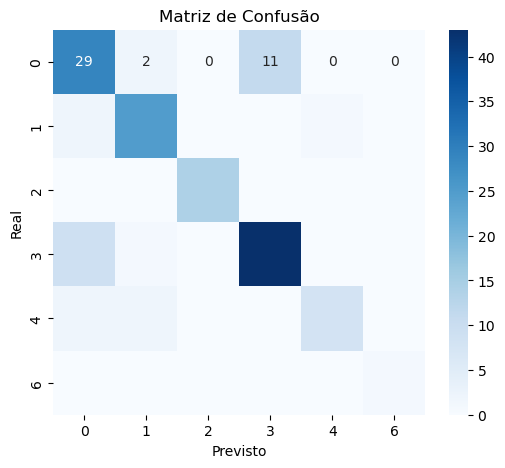

In [55]:
# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Definir rótulos das classes
labels = np.unique(y_test)  # Isso pega as classes únicas nos dados

# Criar o gráfico
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Adicionar títulos e rótulos
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

# Conclusão

Este projeto teve como objetivo desenvolver um modelo preditivo para classificar o tipo de dose da vacina recebida pelos pacientes, utilizando variáveis como idade, município, sexo, raça/cor e fabricante da vacina.

Inicialmente, treinamos um modelo Random Forest sem otimizações, alcançando uma acurácia de 33%. A primeira melhoria veio com o ajuste dos hiperparâmetros utilizando GridSearchCV, o que elevou a acurácia para 53%, um avanço significativo, mas ainda insuficiente.

Para aprimorar o desempenho, aplicamos engenharia de features, transformando variáveis categóricas em representações numéricas com One-Hot Encoding e extraindo informações temporais da data de vacinação (ano e mês). Com essas melhorias, a acurácia subiu para 73%, indicando um modelo mais eficaz.

Na etapa final, testamos o Gradient Boosting (XGBoost), um algoritmo mais sofisticado que capturou padrões mais complexos nos dados, elevando a acurácia final para 80%.

Para avaliar a performance do modelo de forma mais detalhada, utilizamos a matriz de confusão, que permitiu identificar acertos e erros em cada categoria de dose, além de métricas como precisão, recall e F1-score.

Esses resultados mostram que, com ajustes progressivos e técnicas avançadas de pré-processamento e modelagem, conseguimos desenvolver um modelo preditivo robusto. Para futuras melhorias, explorar técnicas de balanceamento de classes, testar mais modelos e aumentar a quantidade de dados pode contribuir para um desempenho ainda melhor.

